In [ ]:
import pandas as pd
# Read from the JSON file
def load_series_from_json(filename):
    loaded_series = pd.read_json(filename)
    return loaded_series

In [ ]:
filename = 'ranked_train'
ranked_train = load_series_from_json(filename)

filename = 'ranked_dev'
ranked_dev = load_series_from_json(filename)

In [3]:
print(ranked_train['tfidf_topk'][0][:10])

['htlvpvz5', '32z7b3fp', 'dbgtslc8', '52cub1om', 'h7hj64q5', 'trmwm9qq', '65gedo6u', 'rwgqkow3', 'am11yqbf', 'tpovr13h']


In [4]:
print(ranked_train)

       post_id                                         tweet_text  cord_uid  \
0            0  Oral care in rehabilitation medicine: oral vul...  htlvpvz5   
1            1  this study isn't receiving sufficient attentio...  4kfl29ul   
2            2  thanks, xi jinping. a reminder that this study...  jtwb17u8   
3            3  Taiwan - a population of 23 million has had ju...  0w9k8iy1   
4            4  Obtaining a diagnosis of autism in lower incom...  tiqksd69   
...        ...                                                ...       ...   
12848    14248  "evidence on covid-19 reveals a growing body o...  9169o29b   
12849    14249  Outdoor lighting has detrimental impacts on lo...  s2bpha8l   
12850    14250  26/ and influenza virus (and other pathogens, ...  atloc9th   
12851    14251  does it?'sars-cov-2-naïve vaccinees had a 13.0...  t4y1ylb3   
12852    14252  when "the airway immune cells of children are ...  nlsv8bin   

                                              tfidf

In [5]:
print(ranked_dev)

      post_id                                         tweet_text  cord_uid  \
0          16  covid recovery: this study from the usa reveal...  3qvh482o   
1          69  "Among 139 clients exposed to two symptomatic ...  r58aohnu   
2          73  I recall early on reading that researchers who...  sts48u9i   
3          93  You know you're credible when NIH website has ...  3sr2exq9   
4          96  Resistance to antifungal medications is a grow...  ybwwmyqy   
...       ...                                                ...       ...   
1395    14193  Residents at high risk of covid-19: effectiven...  0gn3b98n   
1396    14196  61% of teenagers hospitalized for covid were "...  25bdifv6   
1397    14203  "fresh evidence backing melatonin against covi...  qn6wawxk   
1398    14233  the vaccine doesn't halt the spread, it is pro...  3u3i5myh   
1399    14236  "Great commentary from K. Carvalho,  black pre...  nih4l4ok   

                                             tfidf_topk  
0    

In [ ]:
tweet_texts = ranked_train['tweet_text']
print(tweet_texts[0])

Oral care in rehabilitation medicine: oral vulnerability, oral muscle wasting, and hospital-associated oral issues


In [6]:
max_length_tweet = 0
sum_length_tweets = 0
list_length_tweets = []
for tweet in tweet_texts:
    len_tweet = len(tweet.split(' '))
    sum_length_tweets += len_tweet
    list_length_tweets.append(len_tweet)
    if len_tweet > max_length_tweet:
        max_length_tweet = len_tweet

avg_length_tweets = sum_length_tweets/len(tweet_texts)

print("Maximum length of a tweet: ", max_length_tweet)
print("Average length of a tweet: ", f'{avg_length_tweets:.1f}')

Maximum length of a tweet:  85
Average length of a tweet:  29.8


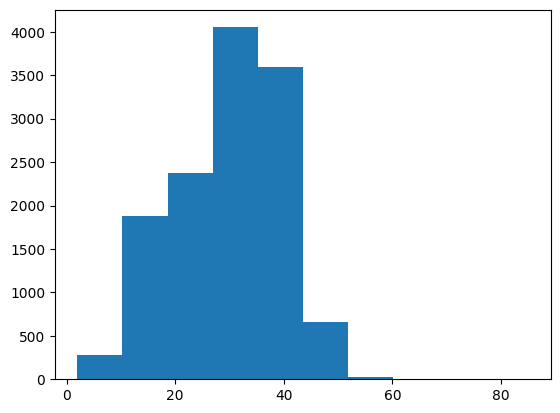

In [7]:
import matplotlib.pyplot as plt

plt.hist(list_length_tweets)
plt.show()

In [9]:
# A check if the corresponding paper is in the top 100
print(ranked_train['cord_uid'][0] in ranked_train['tfidf_topk'][0])

True


In [ ]:
# Import references
PATH_COLLECTION_DATA = '../subtask4b_collection_data.pkl'
df_collection = pd.read_pickle(PATH_COLLECTION_DATA)
df_collection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7718 entries, 162 to 1056448
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cord_uid          7718 non-null   object        
 1   source_x          7718 non-null   object        
 2   title             7718 non-null   object        
 3   doi               7677 non-null   object        
 4   pmcid             4959 non-null   object        
 5   pubmed_id         6233 non-null   object        
 6   license           7718 non-null   object        
 7   abstract          7718 non-null   object        
 8   publish_time      7715 non-null   object        
 9   authors           7674 non-null   object        
 10  journal           6668 non-null   object        
 11  mag_id            0 non-null      float64       
 12  who_covidence_id  528 non-null    object        
 13  arxiv_id          20 non-null     object        
 14  label             7718 n

In [14]:
df_collection.head()

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,label,time,timet
162,umvrwgaw,PMC,Professional and Home-Made Face Masks Reduce E...,10.1371/journal.pone.0002618,PMC2440799,18612429,cc-by,BACKGROUND: Governments are preparing for a po...,2008-07-09,"van der Sande, Marianne; Teunis, Peter; Sabel,...",PLoS One,NaN,NaN,NaN,umvrwgaw,2008-07-09,1215561600
611,spiud6ok,PMC,The Failure of R (0),10.1155/2011/527610,PMC3157160,21860658,cc-by,"The basic reproductive ratio, R (0), is one of...",2011-08-16,"Li, Jing; Blakeley, Daniel; Smith?, Robert J.",Comput Math Methods Med,NaN,NaN,NaN,spiud6ok,2011-08-16,1313452800
918,aclzp3iy,PMC,Pulmonary sequelae in a patient recovered from...,10.4103/0970-2113.99118,PMC3424870,22919170,cc-by-nc-sa,The pandemic of swine flu (H1N1) influenza spr...,2012,"Singh, Virendra; Sharma, Bharat Bhushan; Patel...",Lung India,NaN,NaN,NaN,aclzp3iy,2012-01-01,1325376000
993,ycxyn2a2,PMC,What was the primary mode of smallpox transmis...,10.3389/fcimb.2012.00150,PMC3509329,23226686,cc-by,The mode of infection transmission has profoun...,2012-11-29,"Milton, Donald K.",Front Cell Infect Microbiol,NaN,NaN,NaN,ycxyn2a2,2012-11-29,1354147200
1053,zxe95qy9,PMC,"Lessons from the History of Quarantine, from P...",10.3201/eid1902.120312,PMC3559034,23343512,no-cc,"In the new millennium, the centuries-old strat...",2013-02-03,"Tognotti, Eugenia",Emerg Infect Dis,NaN,NaN,NaN,zxe95qy9,2013-02-03,1359849600


In [ ]:
paper_info = df_collection.set_index('cord_uid')['abstract']
print(paper_info['3qvh482o'], '\n')
print(paper_info[:5])

This cross-sectional study examines rates of cognitive impairment among patients who survived COVID-19 and whether the care setting was associated with cognitive impairment rates. 

cord_uid
umvrwgaw    BACKGROUND: Governments are preparing for a po...
spiud6ok    The basic reproductive ratio, R (0), is one of...
aclzp3iy    The pandemic of swine flu (H1N1) influenza spr...
ycxyn2a2    The mode of infection transmission has profoun...
zxe95qy9    In the new millennium, the centuries-old strat...
Name: abstract, dtype: object


In [10]:
max_length_abstract = 0
sum_length_abstracts = 0
list_length_abstracts = []
paper_info_list = paper_info.values.tolist()
for abstract in paper_info_list:
    word_count = len(abstract.split(' '))
    sum_length_abstracts += word_count
    list_length_abstracts.append(word_count)
    if word_count > max_length_abstract:
        max_length_abstract = word_count

avg_length_abstracts = sum_length_abstracts/len(paper_info_list)

print("Maximum length of the abstracts: ", max_length_abstract)
print("Average length of an abstract: ", f'{avg_length_abstracts:.1f}')

Maximum length of the abstracts:  1234
Average length of an abstract:  232.0


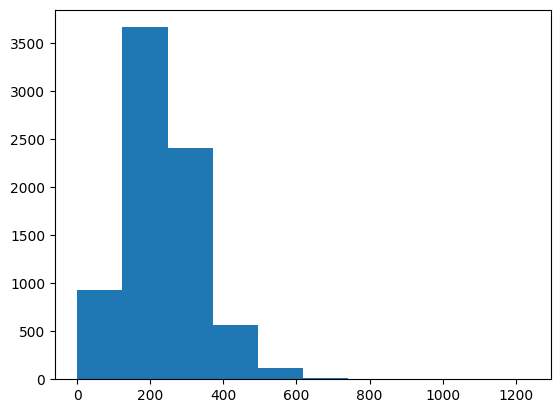

In [14]:
plt.hist(list_length_abstracts)
plt.show()


In [ ]:
tweet_info_train = ranked_train[["tweet_text", "cord_uid", "tfidf_topk"]]
print(tweet_info_train.iloc[0])

tweet_text    Oral care in rehabilitation medicine: oral vul...
cord_uid                                               htlvpvz5
tfidf_topk    [htlvpvz5, 32z7b3fp, dbgtslc8, 52cub1om, h7hj6...
Name: 0, dtype: object


In [ ]:
tweet_info_dev = ranked_dev[["post_id", "tweet_text", "cord_uid", "tfidf_topk"]]
print(tweet_info_dev.iloc[0])

post_id                                                      16
tweet_text    covid recovery: this study from the usa reveal...
cord_uid                                               3qvh482o
tfidf_topk    [25aj8rj5, 66g5lpm6, 59up4v56, o4vvlmr4, vmmwt...
Name: 0, dtype: object


In [17]:
import random

# Get n negative samples (excluding the positive sample)
def get_negative_samples(topk, positive_sample, n=10):
    # Remove the excluded element if it exists
    filtered_array = [elem for elem in topk if elem != positive_sample]
    
    # Make sure n isn't bigger than the available elements
    n = min(n, len(filtered_array))
    
    return random.sample(filtered_array, n)

In [18]:
first_tweet_info = tweet_info_train.iloc[0]
positive_sample = first_tweet_info['cord_uid']
topk = first_tweet_info['tfidf_topk']
negative_samples = get_negative_samples(topk, positive_sample, 10)

assert positive_sample not in negative_samples

print(negative_samples)

['6hl55c60', 'znpc5jq2', 'nnkul2r2', '4j8efxsw', 'omk29wlq', 'f3j0g82b', 'xmjj1s5s', '1gv3t5t0', '65gedo6u', 'iwd8nkls']


Baseline approach
===

In [ ]:
from datasets import Dataset

train_data_list_of_dicts = []

# Iterate through the rows of the tweet_info_train DataFrame
for index, row in tweet_info_train.iterrows():
    tweet_text = row["tweet_text"]
    correct_cord_uid = row["cord_uid"]

    # Get the abstract of the correct paper
    if correct_cord_uid in paper_info:
        correct_abstract = paper_info[correct_cord_uid]

        # Ensure the abstract is a string and not empty
        if isinstance(correct_abstract, str) and correct_abstract.strip():
            # Create a dictionary for this training example (a positive pair)
            example_dict = {
                'query': tweet_text,
                'positive': correct_abstract,
                'label': 1.0 # Label indicating it's a positive pair
            }
            train_data_list_of_dicts.append(example_dict)

        else:
            # Handle cases where the abstract is missing, not a string, or empty after stripping whitespace
            print(f"Warning: Abstract {correct_abstract} is not a string or empty, skipping tweet at index {index}.")

    else:
        # Handle cases where the correct paper's abstract is not found in your paper_info data
        print(f"Warning: Correct abstract not found for {correct_cord_uid} for tweet at index {index}, skipping tweet.")

print(f"Created {len(train_data_list_of_dicts)} training examples as dictionaries.")

# Convert the list of dictionaries into a datasets.Dataset
train_dataset = Dataset.from_list(train_data_list_of_dicts)

print(f"Converted to Hugging Face Dataset with {len(train_dataset)} rows and columns: {train_dataset.column_names}")
print(train_dataset[0])

/home/lukas/AIR/CLEF2025-4b/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created 12853 training examples as dictionaries.
Converted to Hugging Face Dataset with 12853 rows and columns: ['query', 'positive', 'label']
{'query': 'Oral care in rehabilitation medicine: oral vulnerability, oral muscle wasting, and hospital-associated oral issues', 'positive': 'Oral health is a crucial but often neglected aspect of rehabilitation medicine. Approximately 71% of hospitalized rehabilitation patients and 91% of hospitalized acute care patients have impaired oral health. Poor oral condition in hospitalized patients can be attributed to factors such as age, physical dependency, cognitive decline, malnutrition, low skeletal muscle mass and strength, and multimorbidity. Another major factor is a lack of knowledge and interest in oral problems among health care workers. Recently, new concepts have been proposed, such as oral frailty, oral sarcopenia, and hospital-associated oral problems. Oral frailty, the accumulation of a slightly poor status of oral conditions and funct

In [ ]:
from sentence_transformers import SentenceTransformer

def load_sentence_transformer_model(name):
    try:
        model = SentenceTransformer(name)
        print(f"Successfully loaded {name}")
    except Exception as e:
        print(f"Failed to load the model. Error: {e}")
        import traceback
        traceback.print_exc() # Print full traceback if it fails
    return model

In [ ]:
model = load_sentence_transformer_model('sentence-transformers/all-roberta-large-v1')

In [ ]:
eval_examples = []
n_correct_cord_uid_not_in_top_k = 0

# Iterate through the rows of the validation tweet_info DataFrame
for index, row in tweet_info_dev.iterrows():
    query_text = row['tweet_text']
    correct_cord_uid = row['cord_uid'] # This is the ID of the correct paper
    top_k_candidate_uids = row['tfidf_topk'] # This is the list of UIDs from the first stage ranker

    # We need the abstract for the correct paper and for all candidate papers
    positive_abstract = None
    negative_abstracts_map = {} # Map UID to abstract text for candidates

    # Get the positive abstract
    if correct_cord_uid in paper_info and isinstance(paper_info[correct_cord_uid], str) and paper_info[correct_cord_uid].strip():
        positive_abstract = paper_info[correct_cord_uid]

    # Get abstracts for all negative candidates (all in the top-k list except the positive abstract)
    for uid in top_k_candidate_uids:
        if uid in paper_info and uid != correct_cord_uid:
            negative_abstracts_map[uid] = paper_info[uid]

    if positive_abstract and negative_abstracts_map: # Ensure we have the positive and at least one negative abstract
        negative_uids_list = list(negative_abstracts_map.keys())
        negative_abstracts_list = list(negative_abstracts_map.values())

        if correct_cord_uid in top_k_candidate_uids:
            eval_examples.append({
                "query": query_text,
                "positive": [positive_abstract],
                "negative": negative_abstracts_list
            })
            
        else:
            # This case means the correct paper was not found in the top-k list from the first stage ranker.
            n_correct_cord_uid_not_in_top_k += 1

if n_correct_cord_uid_not_in_top_k > 0:
    print(f"Warning: {n_correct_cord_uid_not_in_top_k} correct cord_uid's are not in top-k for validation tweets, cannot evaluate re-ranking for them.")

print(f"Created {len(eval_examples)} evaluation examples for RerankingEvaluator.")
print(eval_examples[0])

Created 1214 evaluation examples for RerankingEvaluator.
{'query': 'covid recovery: this study from the usa reveals that a proportion of cases experience impairment in some cognitive functions for several months after infection. some possible biases &amp; limitations but more research is required on impact of these long term effects.', 'positive': ['This cross-sectional study examines rates of cognitive impairment among patients who survived COVID-19 and whether the care setting was associated with cognitive impairment rates.'], 'negative': ['Since its emergence in Wuhan, China, covid-19 has spread and had a profound effect on the lives and health of people around the globe. As of 4 July 2021, more than 183 million confirmed cases of covid-19 had been recorded worldwide, and 3.97 million deaths. Recent evidence has shown that a range of persistent symptoms can remain long after the acute SARS-CoV-2 infection, and this condition is now coined long covid by recognized research institutes

In [ ]:
from sentence_transformers import (
    SentenceTransformerTrainer,
    SentenceTransformerTrainingArguments,
)
from sentence_transformers.losses import MultipleNegativesRankingLoss
from sentence_transformers.training_args import BatchSamplers
from sentence_transformers.evaluation import RerankingEvaluator

------- BEGIN of the training -------
===

In [ ]:
BATCH_SIZE = 5 # WAS accidently low - but we can't go as high as e.g. 32 with the 4090.
num_epochs = 10 # You can adjust this number. 5-10 is a common starting point.

# Define train loss
loss = MultipleNegativesRankingLoss(model)

# (Optional) Specify training arguments
args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir='output/bi-encoder-roberta-large-baseline',
    # Optional training parameters:
    num_train_epochs=num_epochs,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    learning_rate=2e-5,
    warmup_ratio=0.1,
    fp16=False,  # Set to False if you get an error that your GPU can't run on FP16
    bf16=True,  # Set to True if you have a GPU that supports BF16
    batch_sampler=BatchSamplers.NO_DUPLICATES,  # MultipleNegativesRankingLoss benefits from no duplicate samples in a batch
    # Optional tracking/debugging parameters:
    eval_strategy="epoch",
    eval_steps=None,
    save_strategy="epoch",
    save_steps=None,
    save_total_limit=2,
    logging_steps=10,
    run_name="bi-encoder-roberta-large-baseline-tweet-paper-reranking",  # Will be used in W&B if `wandb` is installed
)

# (Optional) Create an evaluator & evaluate the base model
# !!! WARNING !!! This evaluator EXCLUDES cases where the true paper IS NOT in the top k !!
dev_evaluator = RerankingEvaluator(eval_examples, batch_size=BATCH_SIZE, name='validation_reranking')
dev_evaluator(model)

# Create a trainer & train
trainer = SentenceTransformerTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=None,
    loss=loss,
    evaluator=dev_evaluator,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Validation Reranking Map,Validation Reranking Mrr@10,Validation Reranking Ndcg@10
1,0.324200,No log,0.712622,0.707910,0.755799


KeyboardInterrupt: 

------- END of the training -------
===

Create the repo on huggingface if it does not already exists
---

In [ ]:
repo_id_str = 'LukasXperiaZ/roberta-large-tweet-paper-reranker-baseline'

In [ ]:
# Delete the repo when needed
#from huggingface_hub import delete_repo
#delete_repo(repo_id_str)

In [19]:
# Save the trained model on hugging face (in a new repo)
from huggingface_hub import create_repo

def create_repo_on_huggingface(repo_id_str):
    try:
        repo_url = create_repo(repo_id=repo_id_str, exist_ok=True, private=True)
        print(f"Created or found repository on Hugging Face Hub: {repo_url}")
        # create_repo returns the URL of the repository, not the repo_id string.
        # Let's keep the repo_id string for upload_folder
        repo_id = repo_id_str

    except TypeError as e:
        print(f"Error creating repository: {e}")
        print("It seems your huggingface_hub library version is incompatible.")
        print("Please update it: pip install -U huggingface_hub")
    except Exception as e:
        print(f"An unexpected error occurred while creating the repository: {e}")
    return repo_id

In [ ]:
repo_id = create_repo_on_huggingface(repo_id_str)

In [21]:
# Uploads the model to hugging face
from huggingface_hub import upload_folder

def upload_model_to_huggingface(local_folder_path, repo_id):
    # Path to your local directory containing the trained model files

    print(f"Uploading files from {local_folder_path} to {repo_id}...")

    upload_folder(
        folder_path=local_folder_path,
        repo_id=repo_id,
        repo_type='model', # Specify the type of repository
        commit_message='Upload final model from checkpoint',
    )

    print("Upload complete!")

In [ ]:
local_folder_path = 'output/bi-encoder-roberta-large-baseline/checkpoint-12855'
upload_model_to_huggingface(local_folder_path, repo_id)

Download the trained model from Hugging Face
---

In [28]:
model_from_hub = SentenceTransformer(repo_id)
print(f"Model loaded successfully from Hugging Face Hub: {repo_id}")

Model loaded successfully from Hugging Face Hub: LukasXperiaZ/roberta-large-tweet-paper-reranker-baseline


Let the model rerank the dev set

In [25]:
from sentence_transformers import util

# --- Define the Re-ranking Function for a single tweet ---
def rerank_tweet(tweet_text: str, initial_top_k_uids: list, paper_info: pd.Series, model: SentenceTransformer) -> list:
    """
    Re-ranks a list of candidate paper UIDs for a given tweet using a SentenceTransformer model.

    Args:
        tweet_text: The text of the query tweet.
        initial_top_k_uids: A list of paper UIDs from the initial ranker.
        paper_info: A pandas Series mapping CORD UIDs to abstract texts.
        model: The loaded SentenceTransformer model for encoding.

    Returns:
        A list of re-ranked paper UIDs sorted by relevance score (descending).
        Returns an empty list if no valid candidates are available or re-ranking fails.
    """
    candidate_abstracts = {}
    candidate_uids = []

    # Retrieve Abstracts for the initial Top-k UIDs
    if initial_top_k_uids and isinstance(initial_top_k_uids, list):
        for uid in initial_top_k_uids:
            if uid in paper_info and isinstance(paper_info[uid], str) and paper_info[uid].strip():
                candidate_abstracts[uid] = paper_info[uid]
                candidate_uids.append(uid)

    # Perform Re-ranking if valid candidates exist
    if candidate_uids:
        candidate_abstract_texts = [candidate_abstracts[uid] for uid in candidate_uids]

        try:
            # Encode the Tweet and Candidate Abstracts
            # Ensure inputs are on the same device as the model
            query_embedding = model.encode(tweet_text, convert_to_tensor=True, show_progress_bar=False)
            candidate_embeddings = model.encode(candidate_abstract_texts, convert_to_tensor=True, show_progress_bar=False)

            # Calculate Similarity Scores (Dot Product)
            query_embedding = query_embedding.unsqueeze(0) # Ensure 2D
            scores = util.dot_score(query_embedding, candidate_embeddings)[0] # Get scores for single query

            # Pair UIDs with Scores and Sort
            score_uid_pairs = sorted(zip(scores.tolist(), candidate_uids), key=lambda x: x[0], reverse=True)

            # Return the re-ranked list of UIDs
            return [uid for score, uid in score_uid_pairs]

        except Exception as e:
            print(f"Error during encoding or scoring for tweet: '{tweet_text[:50]}...' - {e}")
            return [] # Return empty list on error


    else:
        # No valid candidates, return an empty list
        return []

In [28]:
def rerank_tweets(model_from_hub):
    # --- Prepare DataFrame to store re-ranked results ---
    # Create a new column in tweet_info_dev
    tweet_info_dev['reranked_uids'] = None


    # --- Iterate and Re-rank for each tweet ---
    print(f"\nStarting re-ranking for {len(tweet_info_dev)} tweets ...")

    for index, row in tweet_info_dev.iterrows():
        query_text = row['tweet_text']
        initial_top_k_uids = row['tfidf_topk']

        # Call the rerank_tweet function
        reranked_list = rerank_tweet(query_text, initial_top_k_uids, paper_info, model_from_hub)

        # Store the re-ranked list in the DataFrame
        tweet_info_dev.at[index, 'reranked_uids'] = reranked_list

        # Optional: Print progress
        if (index + 1) % 100 == 0:
            print(f"Processed {index + 1}/{len(tweet_info_dev)} tweets.")


    print(f"\nRe-ranking complete for all tweets.")

    # --- The 'reranked_uids' column in tweet_info_dev now contains the results ---
    # You can access and evaluate tweet_info_dev['reranked_uids']
    print(tweet_info_dev['reranked_uids'][:5])

In [ ]:
rerank_tweets(model_from_hub)

In [27]:
# Evaluate retrieved candidates using MRR@k
def get_performance_mrr(data, col_gold, col_pred, list_k=[1, 5, 10]):
    d_performance = {}
    for k in list_k:
        data["in_topx"] = data.apply(
            lambda x: (1 / ([i for i in x[col_pred][:k]].index(x[col_gold]) + 1)
                      if x[col_gold] in [i for i in x[col_pred][:k]] else 0), axis=1)
        d_performance[k] = data["in_topx"].mean()
    return d_performance

In [37]:
df_dev_eval = pd.DataFrame({
    "cord_uid": tweet_info_dev["cord_uid"],
    "topk": tweet_info_dev["reranked_uids"]
})
print(df_dev_eval[:2])

# Evaluate MRR@k
results_def_rerank_roberta = get_performance_mrr(df_dev_eval, 'cord_uid', 'topk')
print(f"Reranking Results on the dev set: {results_def_rerank_roberta}")

   cord_uid                                               topk
0  3qvh482o  [styavbvi, hg3xpej0, nksd3wuw, 00ia8k0b, 5hxsa...
1  r58aohnu  [r58aohnu, cnz7jlw4, mcmqx7og, mz1bof2x, icgsb...
Reranking Results on the dev set: {1: np.float64(0.5135714285714286), 5: np.float64(0.5918333333333333), 10: np.float64(0.6000099206349205)}


Using a model pretrained on medical data
===

In [15]:
model = load_sentence_transformer_model('pritamdeka/S-PubMedBert-MS-MARCO')

Successfully loaded pritamdeka/S-PubMedBert-MS-MARCO


In [ ]:
BATCH_SIZE = 90
num_epochs = 10

# Define train loss
loss = MultipleNegativesRankingLoss(model)

# (Optional) Specify training arguments
args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir='output/bi-encoder-S-PubMedBert-MS-MARCO',
    # Optional training parameters:
    num_train_epochs=num_epochs,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    learning_rate=2e-5,
    warmup_ratio=0.1,
    fp16=False,  # Set to False if you get an error that your GPU can't run on FP16
    bf16=True,  # Set to True if you have a GPU that supports BF16
    batch_sampler=BatchSamplers.NO_DUPLICATES,  # MultipleNegativesRankingLoss benefits from no duplicate samples in a batch
    # Optional tracking/debugging parameters:
    eval_strategy="epoch",
    eval_steps=None,
    save_strategy="epoch",
    save_steps=None,
    save_total_limit=2,
    logging_steps=10,
    run_name="bi-encoder-S-PubMedBert-MS-MARCO-tweet-paper-reranking",  # Will be used in W&B if `wandb` is installed
)

# (Optional) Create an evaluator & evaluate the base model
# !!! WARNING !!! This evaluator EXCLUDES cases where the true paper IS NOT in the top k !!
dev_evaluator = RerankingEvaluator(eval_examples, batch_size=BATCH_SIZE, name='validation_reranking')
dev_evaluator(model)

# Create a trainer & train
trainer = SentenceTransformerTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=None,
    loss=loss,
    evaluator=dev_evaluator,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Validation Reranking Map,Validation Reranking Mrr@10,Validation Reranking Ndcg@10
1,0.644000,No log,0.688993,0.683346,0.732197
2,0.465300,No log,0.712590,0.707548,0.755158
3,0.360500,No log,0.721051,0.716551,0.764737
4,0.200500,No log,0.728895,0.724555,0.771824
5,0.148100,No log,0.723946,0.719508,0.768025
6,0.143800,No log,0.726987,0.722547,0.770266
7,0.116800,No log,0.730909,0.726515,0.773619
8,0.077200,No log,0.730399,0.726058,0.773472
9,0.073100,No log,0.730984,0.726619,0.773487
10,0.070200,No log,0.733795,0.729329,0.775430


TrainOutput(global_step=1430, training_loss=0.3234364772176409, metrics={'train_runtime': 1392.4486, 'train_samples_per_second': 92.305, 'train_steps_per_second': 1.027, 'total_flos': 0.0, 'train_loss': 0.3234364772176409, 'epoch': 10.0})

In [18]:
repo_id_str = 'LukasXperiaZ/S-PubMedBert-MS-MARCO-tweet-paper-reranker-abstract'

In [23]:
repo_id = create_repo_on_huggingface(repo_id_str)

Created or found repository on Hugging Face Hub: https://huggingface.co/LukasXperiaZ/S-PubMedBert-MS-MARCO-tweet-paper-reranker-abstract


In [24]:
local_folder_path = 'output/bi-encoder-S-PubMedBert-MS-MARCO/checkpoint-1430'
upload_model_to_huggingface(local_folder_path, repo_id)

Uploading files from output/bi-encoder-S-PubMedBert-MS-MARCO/checkpoint-1430 to LukasXperiaZ/S-PubMedBert-MS-MARCO-tweet-paper-reranker-abstract...


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]









model.safetensors:   0%|          | 377k/438M [00:00<02:07, 3.42MB/s]







training_args.bin: 100%|██████████| 6.10k/6.10k [00:00<00:00, 27.1kB/s]
scheduler.pt: 100%|██████████| 1.47k/1.47k [00:00<00:00, 6.12kB/s]
model.safetensors:   0%|          | 1.16M/438M [00:00<02:03, 3.53MB/s]



model.safetensors:   0%|          | 1.56M/438M [00:00<02:08, 3.41MB/s]



rng_state.pth: 100%|██████████| 14.6k/14.6k [00:00<00:00, 25.9kB/s]/s]
model.safetensors:   1%|          | 2.54M/438M [00:00<02:01, 3.58MB/s]



model.safetensors:   1%|          | 3.52M/438M [00:01<02:04, 3.48MB/s]



model.safetensors:   1%|          | 4.03M/438M [00:01<02:06, 3.42MB/s]



model.safetensors:   1%|          | 4.52M/438M [00:01<02:06, 3.43MB/s]



model.safetensors:   1%|          | 5.01M/438M [00:01<02:02, 3.53MB/s]



model.safetensors:   1%|▏         | 5.51M/438M [00:01<02:03, 3.49MB/s]



model.safetensors:   1%|▏         | 6.00M/438M [00

Upload complete!


In [29]:
model_from_hub = SentenceTransformer(repo_id)
print(f"Model loaded successfully from Hugging Face Hub: {repo_id}")

Model loaded successfully from Hugging Face Hub: LukasXperiaZ/S-PubMedBert-MS-MARCO-tweet-paper-reranker-abstract


Evaluate

In [31]:
rerank_tweets(model_from_hub)


Starting re-ranking for 1400 tweets ...
Processed 100/1400 tweets.
Processed 200/1400 tweets.
Processed 300/1400 tweets.
Processed 400/1400 tweets.
Processed 500/1400 tweets.
Processed 600/1400 tweets.
Processed 700/1400 tweets.
Processed 800/1400 tweets.
Processed 900/1400 tweets.
Processed 1000/1400 tweets.
Processed 1100/1400 tweets.
Processed 1200/1400 tweets.
Processed 1300/1400 tweets.
Processed 1400/1400 tweets.

Re-ranking complete for all tweets.
0    [hg3xpej0, 8t2tic9n, krtqq8uo, 00ia8k0b, 5hxsa...
1    [r58aohnu, kiq6xb6k, s2vckt2w, sljh3o2k, tgd6g...
2    [cgc0v1dg, o47v5vgw, q92unteg, osct0lj6, lavcs...
3    [k0f4cwig, 8j3bb6zx, 3sr2exq9, sv48gjkk, kca5r...
4    [ybwwmyqy, ouvq2wpq, vabb2f26, rs3umc1x, sxx3y...
Name: reranked_uids, dtype: object


In [32]:
df_dev_eval = pd.DataFrame({
    "cord_uid": tweet_info_dev["cord_uid"],
    "topk": tweet_info_dev["reranked_uids"]
})

# Evaluate MRR@k
results_def_rerank_S_PubMedBert = get_performance_mrr(df_dev_eval, 'cord_uid', 'topk')
print(f"Reranking Results on the dev set: {results_def_rerank_S_PubMedBert}")

Reranking Results on the dev set: {1: np.float64(0.5407142857142857), 5: np.float64(0.6139761904761905), 10: np.float64(0.6230518707482994)}


Using additionally Title, Authors and Journal
---

In [ ]:
paper_info = df_collection.set_index('cord_uid')[['title', 'abstract', 'authors', 'journal']]
print(paper_info[:1])

cord_uid = 'xd5uhah4'

assert cord_uid in paper_info['title']

title = paper_info['title'][cord_uid]
print('title: ', title)

abstract = paper_info['abstract'][cord_uid]
print('abstract: ', abstract)

authors = paper_info['authors'][cord_uid]
print('authors: ', authors)

journal = paper_info['journal'][cord_uid]
print('journal: ', journal)

                                                      title  \
cord_uid                                                      
umvrwgaw  Professional and Home-Made Face Masks Reduce E...   

                                                   abstract  \
cord_uid                                                      
umvrwgaw  BACKGROUND: Governments are preparing for a po...   

                                                    authors   journal  
cord_uid                                                               
umvrwgaw  van der Sande, Marianne; Teunis, Peter; Sabel,...  PLoS One  
title:  Higher viral load drives infrequent SARS-CoV-2 transmission between asymptomatic residence hall roommates
abstract:  In 2019-2020, the COVID-19 pandemic spread to over 200 countries in less than six months. To understand the basis of this aggressive spread, it is essential to determine the transmission rate and define the factors that increase the risk of transmission. One complication is the 

In [53]:
from datasets import Dataset

train_data_list_of_dicts = []

# Iterate through the rows of the tweet_info_train DataFrame
for index, row in tweet_info_train.iterrows():
    tweet_text = row["tweet_text"]
    correct_cord_uid = row["cord_uid"]

    # Get the title, abstract, authors and journal of the correct paper
    if correct_cord_uid in paper_info['title']:
        correct_title = paper_info['title'][correct_cord_uid]
        correct_abstract = paper_info['abstract'][correct_cord_uid]
        correct_authors = paper_info['authors'][correct_cord_uid]
        correct_journal = paper_info['journal'][correct_cord_uid]

        # Ensure that the abstract  is a string and not empty
        if isinstance(correct_abstract, str) and correct_abstract.strip():

            if not (isinstance(correct_title, str) and correct_title.strip()):
                # Title is missing, leave it blank
                correct_title = ''

            if not (isinstance(correct_authors, str) and correct_authors.strip()):
                correct_authors = ''

            if not (isinstance(correct_journal, str) and correct_journal.strip()):
                correct_journal = ''

            correct_data = '[TITLE]: ' + correct_title + ' [AUTHORS]: ' + correct_authors + ' [JOURNAL]: ' + correct_journal + ' [ABSTRACT]: ' + correct_abstract

            # Create a dictionary for this training example (a positive pair)
            example_dict = {
                'query': tweet_text,
                'positive': correct_data,
                'label': 1.0 # Label indicating it's a positive pair
            }
            train_data_list_of_dicts.append(example_dict)

        else:
            # Handle cases where the some of the data is missing, not a string, or empty after stripping whitespace
            print(f"Warning: Data at {correct_cord_uid} is not a string or empty, skipping tweet at index {index}.")

    else:
        # Handle cases where the correct paper's abstract is not found in your paper_info data
        print(f"Warning: Correct data not found for {correct_cord_uid} for tweet at index {index}, skipping tweet.")

print(f"Created {len(train_data_list_of_dicts)} training examples as dictionaries.")

# Convert the list of dictionaries into a datasets.Dataset
train_dataset = Dataset.from_list(train_data_list_of_dicts)

print(f"Converted to Hugging Face Dataset with {len(train_dataset)} rows and columns: {train_dataset.column_names}")
print(train_dataset[0])

Created 12853 training examples as dictionaries.
Converted to Hugging Face Dataset with 12853 rows and columns: ['query', 'positive', 'label']
{'query': 'Oral care in rehabilitation medicine: oral vulnerability, oral muscle wasting, and hospital-associated oral issues', 'positive': '[TITLE]: Oral Management in Rehabilitation Medicine: Oral Frailty, Oral Sarcopenia, and Hospital-Associated Oral Problems [AUTHORS]: Shiraishi, A.; Wakabayashi, Hidetaka; Yoshimura, Y. [JOURNAL]: J Nutr Health Aging [ABSTRACT]: Oral health is a crucial but often neglected aspect of rehabilitation medicine. Approximately 71% of hospitalized rehabilitation patients and 91% of hospitalized acute care patients have impaired oral health. Poor oral condition in hospitalized patients can be attributed to factors such as age, physical dependency, cognitive decline, malnutrition, low skeletal muscle mass and strength, and multimorbidity. Another major factor is a lack of knowledge and interest in oral problems among

In [55]:
model = load_sentence_transformer_model('pritamdeka/S-PubMedBert-MS-MARCO')

Successfully loaded pritamdeka/S-PubMedBert-MS-MARCO


In [56]:
BATCH_SIZE = 90
num_epochs = 10

# Define train loss
loss = MultipleNegativesRankingLoss(model)

# (Optional) Specify training arguments
args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir='output/bi-encoder-S-PubMedBert-MS-MARCO-title-abstract-author-journal',
    # Optional training parameters:
    num_train_epochs=num_epochs,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    learning_rate=2e-5,
    warmup_ratio=0.1,
    fp16=False,  # Set to False if you get an error that your GPU can't run on FP16
    bf16=True,  # Set to True if you have a GPU that supports BF16
    batch_sampler=BatchSamplers.NO_DUPLICATES,  # MultipleNegativesRankingLoss benefits from no duplicate samples in a batch
    # Optional tracking/debugging parameters:
    eval_strategy="epoch",
    eval_steps=None,
    save_strategy="epoch",
    save_steps=None,
    save_total_limit=2,
    logging_steps=10,
    run_name="bi-encoder-S-PubMedBert-MS-MARCO-tweet-paper-reranking-title-abstract-author-journal",  # Will be used in W&B if `wandb` is installed
)

# (Optional) Create an evaluator & evaluate the base model
# !!! WARNING !!! This evaluator EXCLUDES cases where the true paper IS NOT in the top k !!
dev_evaluator = RerankingEvaluator(eval_examples, batch_size=BATCH_SIZE, name='validation_reranking')
dev_evaluator(model)

# Create a trainer & train
trainer = SentenceTransformerTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=None,
    loss=loss,
    evaluator=dev_evaluator,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Validation Reranking Map,Validation Reranking Mrr@10,Validation Reranking Ndcg@10
1,0.638200,No log,0.679951,0.673822,0.723977
2,0.457800,No log,0.706449,0.701215,0.750021
3,0.320100,No log,0.718107,0.713613,0.762300
4,0.206500,No log,0.729511,0.724878,0.770975
5,0.127200,No log,0.723374,0.718540,0.765454
6,0.128100,No log,0.726988,0.722315,0.769576
7,0.092000,No log,0.726423,0.721610,0.768463
8,0.068700,No log,0.727392,0.722546,0.769244
9,0.062900,No log,0.727287,0.722586,0.769644
10,0.065400,No log,0.726611,0.721696,0.768215


TrainOutput(global_step=1430, training_loss=0.3121883808941274, metrics={'train_runtime': 1386.0572, 'train_samples_per_second': 92.731, 'train_steps_per_second': 1.032, 'total_flos': 0.0, 'train_loss': 0.3121883808941274, 'epoch': 10.0})

Using another loss function and hard negatives
---

You can start the script from here - don't have to execute anything before!

In [1]:
# ----- Do Everything needed -----
import pandas as pd
def load_series_from_json(filename):
    loaded_series = pd.read_json(filename)
    return loaded_series

filename = 'ranked_train'
ranked_train = load_series_from_json(filename)

filename = 'ranked_dev'
ranked_dev = load_series_from_json(filename)

PATH_COLLECTION_DATA = '../subtask4b_collection_data.pkl'
df_collection = pd.read_pickle(PATH_COLLECTION_DATA)

paper_info = df_collection.set_index('cord_uid')['abstract']

tweet_info_train = ranked_train[["tweet_text", "cord_uid", "tfidf_topk"]]

tweet_info_dev = ranked_dev[["post_id", "tweet_text", "cord_uid", "tfidf_topk"]]

from sentence_transformers import SentenceTransformer

def load_sentence_transformer_model(name):
    try:
        model = SentenceTransformer(name)
        print(f"Successfully loaded {name}")
    except Exception as e:
        print(f"Failed to load the model. Error: {e}")
        import traceback
        traceback.print_exc() # Print full traceback if it fails
    return model

eval_examples = []
n_correct_cord_uid_not_in_top_k = 0

# Iterate through the rows of the validation tweet_info DataFrame
for index, row in tweet_info_dev.iterrows():
    query_text = row['tweet_text']
    correct_cord_uid = row['cord_uid'] # This is the ID of the correct paper
    top_k_candidate_uids = row['tfidf_topk'] # This is the list of UIDs from the first stage ranker

    # We need the abstract for the correct paper and for all candidate papers
    positive_abstract = None
    negative_abstracts_map = {} # Map UID to abstract text for candidates

    # Get the positive abstract
    if correct_cord_uid in paper_info and isinstance(paper_info[correct_cord_uid], str) and paper_info[correct_cord_uid].strip():
        positive_abstract = paper_info[correct_cord_uid]

    # Get abstracts for all negative candidates (all in the top-k list except the positive abstract)
    for uid in top_k_candidate_uids:
        if uid in paper_info and uid != correct_cord_uid:
            negative_abstracts_map[uid] = paper_info[uid]

    if positive_abstract and negative_abstracts_map: # Ensure we have the positive and at least one negative abstract
        negative_uids_list = list(negative_abstracts_map.keys())
        negative_abstracts_list = list(negative_abstracts_map.values())

        if correct_cord_uid in top_k_candidate_uids:
            eval_examples.append({
                "query": query_text,
                "positive": [positive_abstract],
                "negative": negative_abstracts_list
            })
            
        else:
            # This case means the correct paper was not found in the top-k list from the first stage ranker.
            n_correct_cord_uid_not_in_top_k += 1

if n_correct_cord_uid_not_in_top_k > 0:
    print(f"Warning: {n_correct_cord_uid_not_in_top_k} correct cord_uid's are not in top-k for validation tweets, cannot evaluate re-ranking for them.")

print(f"Created {len(eval_examples)} evaluation examples for RerankingEvaluator.")

from sentence_transformers import (
    SentenceTransformerTrainer,
    SentenceTransformerTrainingArguments,
)
from sentence_transformers.training_args import BatchSamplers
from sentence_transformers.evaluation import RerankingEvaluator

paper_info = df_collection.set_index('cord_uid')[['title', 'abstract', 'authors', 'journal']]

/home/lukas/AIR/CLEF2025-4b/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created 1214 evaluation examples for RerankingEvaluator.


In [2]:
# Function for generating the document string
def get_document_string(paper_info, cord_uid):
    
    title = paper_info['title'][cord_uid]
    abstract = paper_info['abstract'][cord_uid]
    authors = paper_info['authors'][cord_uid]
    journal = paper_info['journal'][cord_uid]

    if not (isinstance(abstract, str) and abstract.strip()):
        return 'Abstract missing!'

    if not (isinstance(title, str) and title.strip()):
        # Title is missing, leave it blank
        title = ''

    if not (isinstance(authors, str) and authors.strip()):
        authors = ''

    if not (isinstance(journal, str) and journal.strip()):
        journal = ''

    document_string = '[TITLE]: ' + title + ' [AUTHORS]: ' + authors + ' [JOURNAL]: ' + journal + ' [ABSTRACT]: ' + abstract
    return document_string

In [3]:
from datasets import Dataset

train_data_list_of_dicts = []


perc_top_k = 0.75  # How many of the top k-1 should be taken, i.e. 1 means the documents of all other 99 cord_uids will be taken. 

# For hyperparameter tuning, we reduced the number of tweets to have faster learning:
#perc_n_tweets = 0.1
#tweet_info_train = tweet_info_train.sample(frac=perc_n_tweets, random_state=42)

# Iterate through the rows of the tweet_info_train DataFrame
for index, row in tweet_info_train.iterrows():
    tweet_text = row["tweet_text"]
    correct_cord_uid = row["cord_uid"]
    negative_cord_uids = [elem for elem in row['tfidf_topk'] if elem != correct_cord_uid]

    # Get the title, abstract, authors and journal of the correct paper
    if correct_cord_uid in paper_info['title']:
        
        document_string_pos = get_document_string(paper_info, correct_cord_uid)
        
        if document_string_pos == 'Abstract missing!':
            print(f"Warning: Abstract missing for {correct_cord_uid} in paper_info, skipping tweet.")
            continue

        last_indx = int(perc_top_k * (len(negative_cord_uids) - 1))
        for i in range(0, last_indx + 1):
            negative_cord_uid = negative_cord_uids[i]
            
            document_string_neg = get_document_string(paper_info, negative_cord_uid)

            # Create a dictionary for this training example
            example_dict = {
                'anchor': tweet_text,
                'positive': document_string_pos,
                'negative': document_string_neg
            }
            train_data_list_of_dicts.append(example_dict)

    else:
        # Handle cases where the correct paper's abstract is not found in your paper_info data
        print(f"Warning: Correct data not found for {correct_cord_uid} for tweet at index {index}, skipping tweet.")

print(f"Created {len(train_data_list_of_dicts)} training examples as dictionaries.")

# Convert the list of dictionaries into a datasets.Dataset
train_dataset = Dataset.from_list(train_data_list_of_dicts)

print(f"Converted to Hugging Face Triplet Dataset with {len(train_dataset)} rows and columns: {train_dataset.column_names}")
print(train_dataset[0])

Created 952838 training examples as dictionaries.
Converted to Hugging Face Triplet Dataset with 952838 rows and columns: ['anchor', 'positive', 'negative']
{'anchor': 'Oral care in rehabilitation medicine: oral vulnerability, oral muscle wasting, and hospital-associated oral issues', 'positive': '[TITLE]: Oral Management in Rehabilitation Medicine: Oral Frailty, Oral Sarcopenia, and Hospital-Associated Oral Problems [AUTHORS]: Shiraishi, A.; Wakabayashi, Hidetaka; Yoshimura, Y. [JOURNAL]: J Nutr Health Aging [ABSTRACT]: Oral health is a crucial but often neglected aspect of rehabilitation medicine. Approximately 71% of hospitalized rehabilitation patients and 91% of hospitalized acute care patients have impaired oral health. Poor oral condition in hospitalized patients can be attributed to factors such as age, physical dependency, cognitive decline, malnutrition, low skeletal muscle mass and strength, and multimorbidity. Another major factor is a lack of knowledge and interest in oral

In [4]:
model = load_sentence_transformer_model('pritamdeka/S-PubMedBert-MS-MARCO')

Successfully loaded pritamdeka/S-PubMedBert-MS-MARCO


In [5]:
from sentence_transformers.losses import TripletLoss

margin = 0.5    # 0.5 workes quite well
loss = TripletLoss(model=model, triplet_margin=margin)

In [ ]:
BATCH_SIZE = 52
num_epochs = 5

# Specify training arguments
args = SentenceTransformerTrainingArguments(
    # Required parameter:
    output_dir='output/bi-encoder-S-PubMedBert-MS-MARCO-title-abstract-author-journal-triplet-loss',
    # Optional training parameters:
    num_train_epochs=num_epochs,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    learning_rate=2e-5,
    warmup_ratio=0.1,
    fp16=False,  # Set to False if you get an error that your GPU can't run on FP16
    bf16=True,  # Set to True if you have a GPU that supports BF16
    # Optional tracking/debugging parameters:
    eval_strategy="epoch",
    eval_steps=None,
    save_strategy="epoch",
    save_steps=None,
    save_total_limit=5,
    logging_steps=10,
    run_name="bi-encoder-S-PubMedBert-MS-MARCO-tweet-paper-reranking-title-abstract-author-journal-triplet-loss",  # Will be used in W&B if `wandb` is installed
)

# Create an evaluator & evaluate the base model
# !!! WARNING !!! This evaluator EXCLUDES cases where the true paper IS NOT in the top k !!
dev_evaluator = RerankingEvaluator(eval_examples, batch_size=BATCH_SIZE, name='validation_reranking')
dev_evaluator(model)

# Create a trainer & train
trainer = SentenceTransformerTrainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=None,
    loss=loss,
    evaluator=dev_evaluator,
)

trainer.train()